# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [187]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scikitplot.metrics import plot_roc

from sklearn.metrics import accuracy_score, f1_score

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


In [188]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [189]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,549,107,51,103,182,56,11,213,31,24,162,226,673,217,72,2,4,188,198
1,397,89,41,75,162,66,5,153,43,19,136,175,352,154,72,2,0,188,195
2,363,89,47,85,147,58,10,153,44,19,151,175,349,186,74,13,7,186,197
3,633,102,52,101,213,64,10,203,33,23,157,214,616,186,65,0,19,193,203
4,644,96,46,88,160,64,9,151,44,19,148,173,339,182,70,15,11,192,199
5,480,104,55,100,201,66,10,214,31,24,173,224,680,221,74,1,1,185,194
6,10,86,36,70,143,61,9,133,50,18,130,153,266,127,66,2,10,194,202
7,430,104,53,108,206,61,11,217,31,24,168,226,694,209,67,0,9,188,201
8,417,96,36,74,183,70,6,149,43,19,127,178,341,127,69,0,17,201,205
9,673,91,35,66,159,59,7,147,45,19,131,169,322,123,64,1,1,197,203


Methods `describe` and `info` deliver some useful information.

In [190]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,433.238616,93.832423,44.874317,82.511840,169.010929,61.502732,8.575592,169.118397,40.828780,20.601093,148.067395,188.712204,440.979964,174.854281,72.131148,6.395264,12.506375,189.061931,195.859745
std,244.080943,8.210349,6.147269,15.603269,32.485761,7.427170,4.314319,32.911663,7.700117,2.579269,14.388414,30.826940,175.112241,33.169448,7.162931,5.004601,8.977997,6.118641,7.406867
min,3.000000,73.000000,33.000000,40.000000,110.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,224.000000,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,136.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,444.000000,93.000000,44.000000,80.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,365.000000,174.000000,71.000000,5.000000,11.000000,189.000000,197.000000
75%,642.000000,100.000000,50.000000,98.000000,194.000000,65.000000,10.000000,198.000000,46.000000,23.000000,160.000000,217.000000,586.000000,198.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,844.000000,119.000000,58.000000,110.000000,322.000000,133.000000,55.000000,260.000000,61.000000,28.000000,188.000000,288.000000,982.000000,268.000000,127.000000,22.000000,38.000000,204.000000,211.000000


In [191]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [192]:
# has nan?
X_train_pd.isnull().values.any()

False

In [193]:
corr_v = .96
correlations = np.abs(X_train_pd.corr()) 
correlations[correlations <=corr_v] = False
correlations[correlations == 1.0] = 1.1
correlations[(correlations > corr_v) & (correlations != 1.1)] = True
correlations[correlations == 1.1] = False
correlations = correlations[correlations.any()]


correlations.T[correlations.any()]

,2,7,8,9,10,12
2,False,False,False,False,True,False
7,False,False,True,True,False,True
8,False,True,False,False,False,False
9,False,True,False,False,False,True
10,True,False,False,False,False,False
12,False,True,False,True,False,False


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

hyperparameters = {
    "multi_class" : "multinomial",
    "solver" : "saga",
    "tol": 1e-3,
    "max_iter": 500
}

grid = {'C': np.logspace(-3, 3, 15)}

predictor = LogisticRegression(**hyperparameters)
grid = GridSearchCV(predictor, grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': array([1.00000000e-03, 2.68269580e-03, 7.19685673e-03, 1.93069773e-02,
       5.17947468e-02, 1.38949549e-01, 3.72759372e-01, 1.00000000e+00,
       2.68269580e+00, 7.19685673e+00, 1.93069773e+01, 5.17947468e+01,
       1.38949549e+02, 3.72759372e+02, 1.00000000e+03])})

In [195]:
best_params, best_score = grid.best_params_, grid.best_score_

Accuracy: 0.7239057239057239
F1 Score: 0.7196436153025462


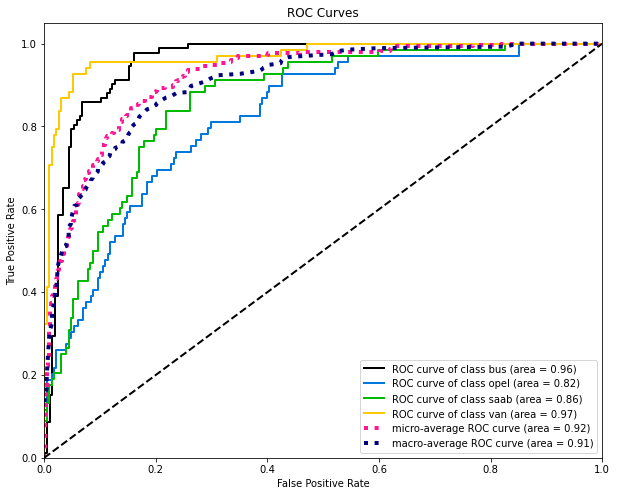

In [196]:

y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}\nF1 Score: {f1}")


plot_roc(y_test, grid.predict_proba(X_test), figsize=(10,8))
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

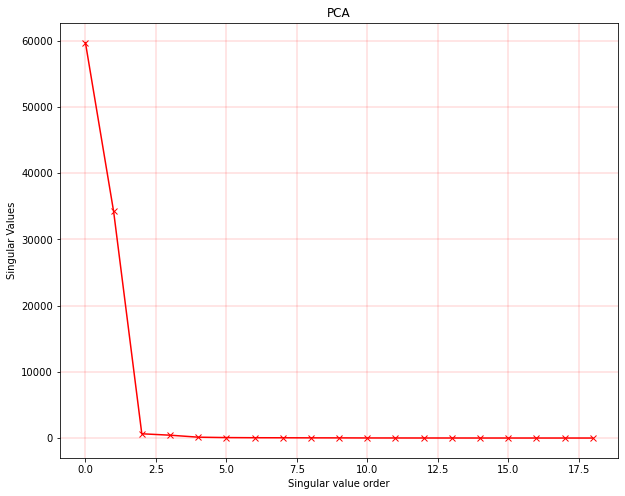

In [197]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver="full")
pca.fit(X_train)

plt.figure(figsize=(10,8))
plt.plot(pca.explained_variance_, color="r", marker="x")
plt.grid(color='r', linestyle='-', linewidth=.2)
plt.title("PCA")
plt.xlabel("Singular value order")
plt.ylabel("Singular Values")
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

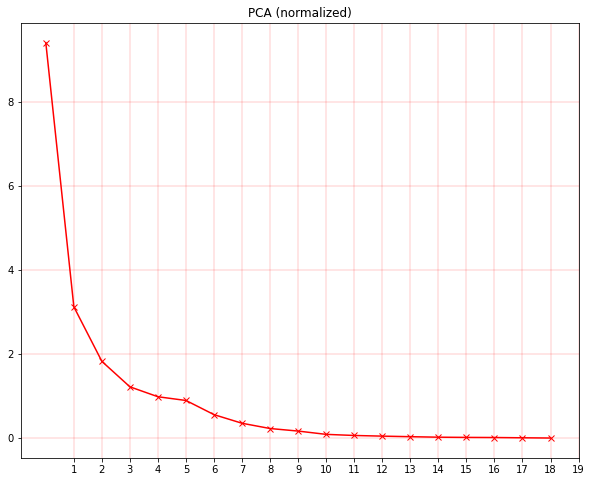

In [198]:
from sklearn.preprocessing import StandardScaler

pca = PCA()
normalized = pca.fit(StandardScaler().fit_transform(X_train))
plt.figure(figsize=(10,8))
plt.title("PCA (normalized)")
plt.grid(color='r', linestyle='-', linewidth=.2)
plt.plot(pca.explained_variance_, color="r", marker="x")
plt.xticks(np.arange(1,pca.explained_variance_.size+1))
plt.show()

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [199]:
from sklearn.pipeline import Pipeline

n_comp = 10

params = {
    "multi_class": 'multinomial',
    "solver":'saga', 
    "tol":1e-3
}

lr = LogisticRegression(**params)

pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("pca",PCA(n_components=n_comp)), 
    ("lr", lr)
])

model = GridSearchCV(pipeline, {'lr__C': np.logspace(-2, 2, 15)}, cv=5)

In [200]:
model.fit(X_train, y_train)
model.best_params_, model.best_score_

({'lr__C': 0.517947467923121}, 0.693928273561301)

Accuracy: 0.7239057239057239
F1 Score: 0.7196436153025462


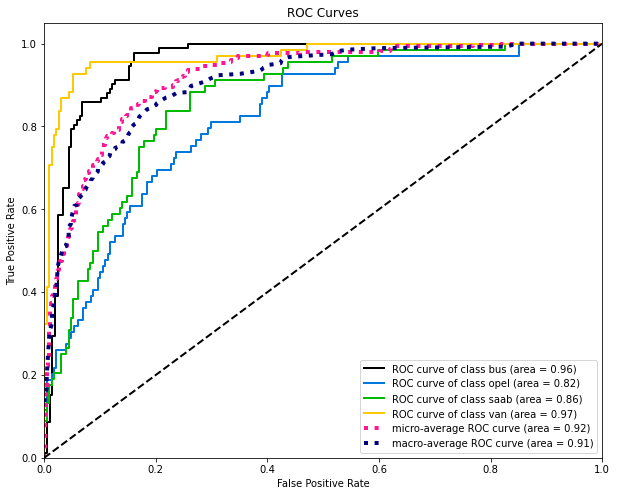

In [201]:
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}\nF1 Score: {f1}")
plot_roc(y_test, grid.predict_proba(X_test), figsize=(10,8))
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [202]:
from sklearn.tree import DecisionTreeClassifier


tree = GridSearchCV(DecisionTreeClassifier(), {"max_depth" : np.arange(1,30)}, cv=10)
tree.fit(X_train, y_train)

depth = tree.best_params_['max_depth']
tree_model = tree.best_estimator_
tree_best_params = tree.best_params_

Accuracy: 0.7239057239057239
F1 Score: 0.7196436153025462


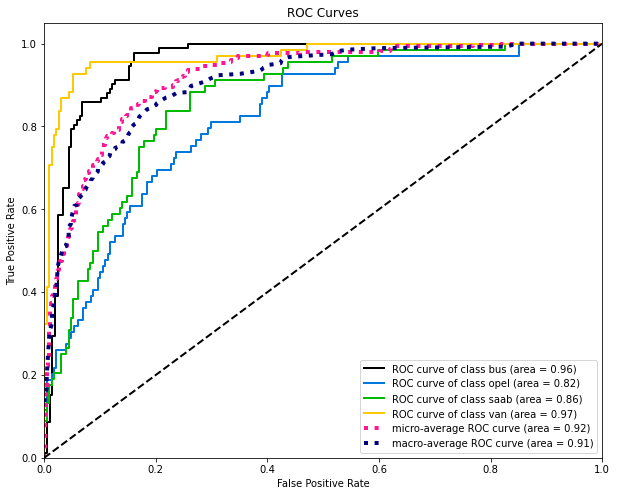

In [203]:
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}\nF1 Score: {f1}")
plot_roc(y_test, grid.predict_proba(X_test), figsize=(10,8))
plt.show()

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [204]:
from sklearn.ensemble import RandomForestClassifier as RFC

results = []
grid = np.arange(2, 100, 5)
for n in grid:
    results.append(RFC(n_estimators=n).fit(X_train, y_train).predict(X_test))

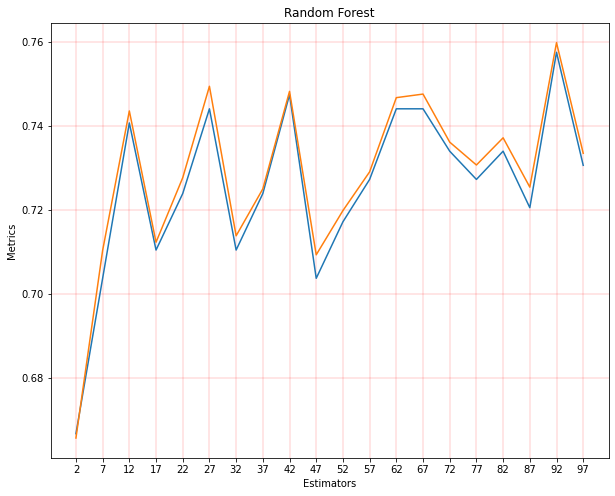

In [205]:
forest_accuracy = [accuracy_score(y_test, y_pred) for y_pred in results]
forest_f1 = [f1_score(y_test, y_pred, average="weighted") for y_pred in results]

plt.figure(figsize=(10,8))
plt.grid(color='r', linestyle='-', linewidth=.2)
plt.plot(grid, forest_accuracy)
plt.plot(grid, forest_f1)

plt.xticks(grid)
plt.xlabel("Estimators")
plt.ylabel("Metrics")
plt.title("Random Forest")


plt.show()

In [206]:
best_estimators = grid[np.argmax(forest_accuracy)]
print(f'Best no of estimators: {best_estimators}')


Best no of estimators: 92


#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [207]:
lr = LogisticRegression(**hyperparameters, **best_params)
tree = DecisionTreeClassifier(**tree_best_params)
forest = RFC(n_estimators=best_estimators)

size = X_train.shape[0]
parts = 10
sizes = np.arange(size//parts, size, size//parts)


get_data = lambda model, size: model.fit(X_train[:size, :], y_train[:size]).predict(X_test)

lr_acc = []
tree_acc  =[]
forest_acc = []

lr_f1 = []
tree_f1  =[]
forest_f1 = []

for size in sizes:
    lr_acc.append(accuracy_score(y_test, get_data(lr, size)))
    tree_acc.append(accuracy_score(y_test, get_data(tree, size)))
    forest_acc.append(accuracy_score(y_test, get_data(forest, size)))

    lr_f1.append(f1_score(y_test, get_data(lr, size), average='weighted'))
    tree_f1.append(f1_score(y_test, get_data(tree, size), average='weighted'))
    forest_f1.append(f1_score(y_test, get_data(forest, size), average='weighted'))

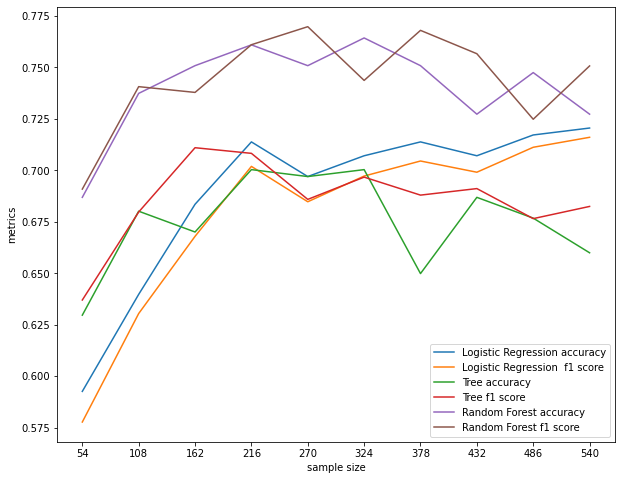

In [208]:
plt.figure(figsize=(10,8))

plt.plot(sizes, lr_acc, label="Logistic Regression accuracy")
plt.plot(sizes, lr_f1, label="Logistic Regression  f1 score")


plt.plot(sizes, tree_acc, label="Tree accuracy")
plt.plot(sizes, tree_f1, label="Tree f1 score")

plt.plot(sizes, forest_acc, label="Random Forest accuracy")
plt.plot(sizes, forest_f1, label="Random Forest f1 score")

plt.xticks(sizes)
plt.xlabel('sample size')
plt.ylabel('metrics')
plt.legend()

plt.show()